In [1]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install pygraphviz --install-option="--include-path=/usr/include/graphviz" --install-option="--library-path=/usr/lib/graphviz/"

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

## Dummy dataset

In [4]:
df = pd.read_csv('../data/train.csv')

In [5]:
df.head()

,id,y,age,job,marital,education,default,housing,loan,contact,...,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,36,blue-collar,married,basic.9y,unknown,no,no,telephone,...,2,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
1,1,0,34,technician,married,professional.course,no,yes,no,cellular,...,4,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
2,2,0,28,student,single,university.degree,unknown,yes,no,cellular,...,4,2,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1
3,3,0,36,technician,single,high.school,no,yes,no,cellular,...,4,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1
4,4,0,53,blue-collar,married,unknown,unknown,yes,no,cellular,...,5,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1


In [6]:
data = df[['month', 'campaign', 'previous', 'marital', 'job']]

In [7]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore

# create some data with dependencies
# data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 8)), columns=list('ABCDEFGH'))
# data['A'] += data['B'] + data['C']
# data['H'] = data['G'] - data['A']

hc = HillClimbSearch(data, scoring_method=BicScore(data))
best_model = hc.estimate()
print(best_model.edges())

[('month', 'job'), ('previous', 'month'), ('job', 'marital')]


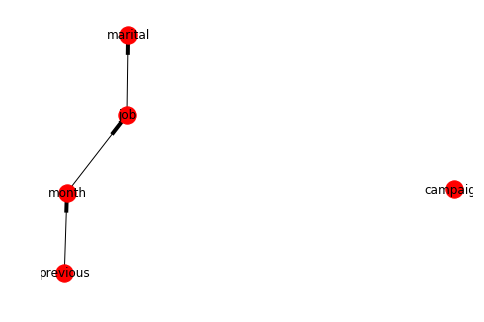

In [8]:
nx.draw(best_model, with_labels=True, pos=graphviz_layout(best_model))
plt.show()

## Credit Card Fraud

In [9]:
df = pd.read_csv('../data/171003_df_cleansed.csv')

In [10]:
print(df.shape)
print(df[df['fraudulent'] == 1].shape)

(15487, 126)
(423, 126)


In [11]:
df.head()

,id,fraudulent,account_id,analysis_blacklisted,analysis_score,buyer_age_of_first_analysis_in_days,buyer_consecutive_immediate_departure_sales,buyer_credit_limit,buyer_dormancy_in_days,buyer_identification,...,payment_attempts_count,payment_credit_card_holder_names_diff_passenger_last_names,payment_credit_cards_count,payment_with_credit_card,ticket_count,ticket_passengers_names,updated_at,user_existence_in_days,user_existence_in_days_7_or_less,issued_at
0,4552758,False,NaN,NaN,NaN,NaN,NaN,0.0,NaN,17575183000176,...,1.0,False,NaN,True,NaN,NaN,NaN,102,False,2017-06-19T17:39:56-03:00
1,4747521,False,NaN,NaN,NaN,NaN,NaN,0.0,NaN,11522823000101,...,1.0,True,NaN,True,NaN,NaN,NaN,224,False,2017-07-13T15:17:36-03:00
2,4543771,False,NaN,NaN,NaN,NaN,NaN,0.0,NaN,13504575000193,...,0.0,True,NaN,True,NaN,NaN,NaN,352,False,2017-06-17T13:09:13-03:00
3,4733270,False,NaN,NaN,NaN,NaN,NaN,0.0,NaN,09143327000197,...,2.0,False,NaN,True,NaN,NaN,NaN,111,False,2017-07-12T10:14:40-03:00
4,5307962,False,NaN,False,6.0,201.0,1.0,0.0,62.0,10173211000180,...,1.0,False,1.0,True,1.0,['TEREZINHA MORO'],NaN,48,False,2017-09-26T10:16:18-03:00


In [12]:
#filter features
data = df[[
    'credit_card_holder_and_passenger_similarity',
    'credit_card_min_age_in_days',
    'flight_price_per_passenger',
    'credit_card_min_sales_count',
    'credit_card_max_sales_count_24h',
    'flight_hours_to_departure',
    'credit_card_holder_diff',
    'credit_card_last_names_association_count',
    'fraudulent'
]]

In [13]:
data.head()

,credit_card_holder_and_passenger_similarity,credit_card_min_age_in_days,flight_price_per_passenger,credit_card_min_sales_count,credit_card_max_sales_count_24h,flight_hours_to_departure,credit_card_holder_diff,credit_card_last_names_association_count,fraudulent
0,0.5,17.0,697.57,2.0,2.0,369,1.0,1.0,False
1,0.0,244.0,506.34,250.0,11.0,787,1.0,6.0,False
2,0.2,0.0,257.32,2.0,2.0,439,2.0,2.0,False
3,1.0,0.0,292.24,0.0,0.0,704,1.0,0.0,False
4,1.0,322.0,720.90,22.0,1.0,68,1.0,0.0,False


#### Explore data

In [14]:
data.credit_card_holder_diff.unique()

array([  1.,   2.,   3.,   5.,   6.,   4.,  18.,   7.,   8.,  10.,  12.,
        24.,   9.,  13.,  17.,  19.,  11.,  26.,  14.,   0.,  21.,  16.,
        22.,  20.])

In [ ]:
hc = HillClimbSearch(data, scoring_method=BicScore(data))
best_model = hc.estimate()
print(best_model.edges())